# Удовлетворенность пассажиров авиакомпании

<b>Имеется следующая информация о пассажирах некоторой авиакомпании:</b>
<ol>
    <li><b>Пол</b>: мужской или женский</li>
    <li><b>Тип пассажира</b>: постоянный или непостоянный клиент авиакомпании</li>
    <li><b>Возраст</b>: фактический возраст пассажира</li>
    <li><b>Тип путешествия</b>: цель полета поссажира (личное путешествие или деловое)</li>
    <li><b>Класс обслуживания</b>: бизнес, эконом, эконом плюс</li>
    <li><b>Расстояние полета</b></li>
    <li><b>Услуга Wi-Fi на борту</b>: уровень удовлетворенности услугой Wi-Fi на борту (0: без оценки; 1-5)</li>
    <li><b>Удобное время отправления/прибытия</b>: уровень удовлетворенности временем отправления/прибытия (0: без оценки; 1-5)</li>
    <li><b>Легкость онлайн-бронирования</b>: уровень удовлетворенности онлайн-бронированием (0: без оценки; 1-5)</li>
    <li><b>Расположение выхода</b>: уровень удовлетворенности местоположением выхода (0: без оценки; 1-5)</li>
    <li><b>Еда и напитки</b>: уровень удовлетворенности едой и напитками (0: без оценки; 1-5)</li>
    <li><b>Онлайн-посадка</b>: уровень удовлетворенности онлайн-посадкой (0: без оценки; 1-5)</li>
    <li><b>Комфортность пассажирского кресла</b>: уровень удовлетворенности креслом (0: без оценки; 1-5)</li>
    <li><b>Развлечения в полете</b>: уровень удовлетворенности развлечениями в полете (0: без оценки; 1-5)</li>
    <li><b>Бортовое обслуживание</b>: уровень удовлетворенности бортовым обслуживанием (0: без оценки; 1-5)</li>
    <li><b>Свободное пространство для ног</b>: уровень удовлетворенности свободным пространством для ног (0: без оценки; 1-5)</li>
    <li><b>Транспортировка багажа</b>: уровень удовлетворенности транспортировкой багажа (0: без оценки; 1-5)</li>
    <li><b>Служба регистрации</b>: уровень удовлетворенности службой регистрации (0: без оценки; 1-5)</li>
    <li><b>Обслуживание в полете</b>: уровень удовлетворенности обслуживанием в полете (0: без оценки; 1-5)</li>
    <li><b>Чистота</b>: уровень удовлетворенности чистотой (0: без оценки; 1-5)</li>
    <li><b>Задержка отправления в минутах</b>: задержка в минутах при отправлении</li>
    <li><b>Задержка прибытия в минутах</b>: задержка в минутах при прибытии</li>
</ol>

Данный набор данных содержит опрос об <b>удовлетворенности авиапассажиров</b>. Поставлена следующая <b>задача классификации</b>:

Необходимо предсказать, к какому из <b>двух</b> уровней удовлетворенности авиакомпанией принадлежит пассажир:
<ol>
    <li><em>Удовлетворенность</em></li>
    <li><em>Нейтральность или неудовлетворенность</em></li>
</ol>

***

Ссылка на датасет: [Airline Passenger Satisfaction](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv)

***


## Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

Размеры таблицы:

In [3]:
data.shape

(103904, 25)

Каждая строка соответствует одному пассажиру, а каждый столбец конкретному признаку.<br>
Посмотрим на первые и последние строки набора данных:

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Посмотрим более подробно на данные датасета:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Можно заметить следующее:
<ol>
    <li><b>В столбце</b>, соответствующем признаку <b>Arrival Delay in Minutes, пропущено 310 значений</b>.</li>
    <li><b>Первые два признака являются бесполезными и не повлияют на классификацию</b>, поэтому от них стоит избавиться.</li>
    <li><b>Многие столбцы содержат категориальные значения</b>, но имеют тип 'object' или 'int64'. Заменим данный тип на специальный, предназначенный для хранения категориальных значений.</li>
</ol>

In [7]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [8]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

Теперь информация о датасете выглядит следующим образом:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

Первые 22 признака были подробно описаны выше. Признак <b>satisfaction</b> является целевым.

## Визуализация данных (c интепретацией) и вычисление основных характеристик

Получим сводную информацию о количественных признаках, вызвав метод describe с параметрами по умолчанию:

In [10]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Теперь получим информацию о категориальных признаках:

In [11]:
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


Для каждого категориального признака приведены общее количество значений, количество уникальных значений, наиболее часто встречающийся элемент и общее количество таких элементов.

Посмотрим на соотношение значений целевой переменной:

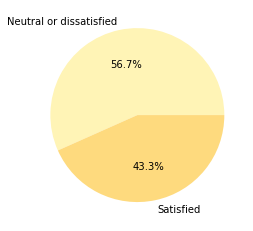

In [12]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Как видно из круговой диаграммы, <b>выборка является более менее сбалансированной</b>.

Вычислим матрицу корреляции для количественных признаков и используем визуальный образ данной матрицы:

In [13]:
corr_mat = data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


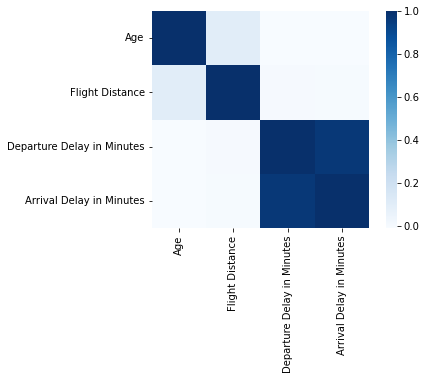

In [14]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

Можно заметить, что между признаками <em>'Задержка отправления в минутах'</em> и <em>'Задержка прибытия в минутах'</em> наблюдается большая корреляция. Величина коэффициента корреляции достигает следующего значения:

In [15]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
dtype: float64

Построим диаграмму рассеивания для данных признаков:

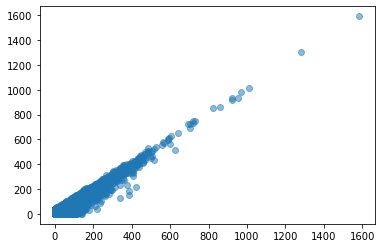

In [16]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)
pass

Можно заметить, что точки выстроились более-менее вдоль прямой, идущей из нижнего левого угла в правый верхний. Таким образом, в некотором приближении <b>зависимость задержки времени прибытия от задержки времени отправления линейная</b>.

Полученные результаты являются вполне логичными, и их можно объяснить следующим образом. Если рейс клиентов авиакомпании при отправлении был задержан на некоторое количество времени, то примерно на такое же количество времени рейс задержится при посадке (при условии, что самолет в полете не будет ускоряться, чтобы нагнать упущенное время).

Рассмотрим соотношение значений для каждого из категориальных признаков:

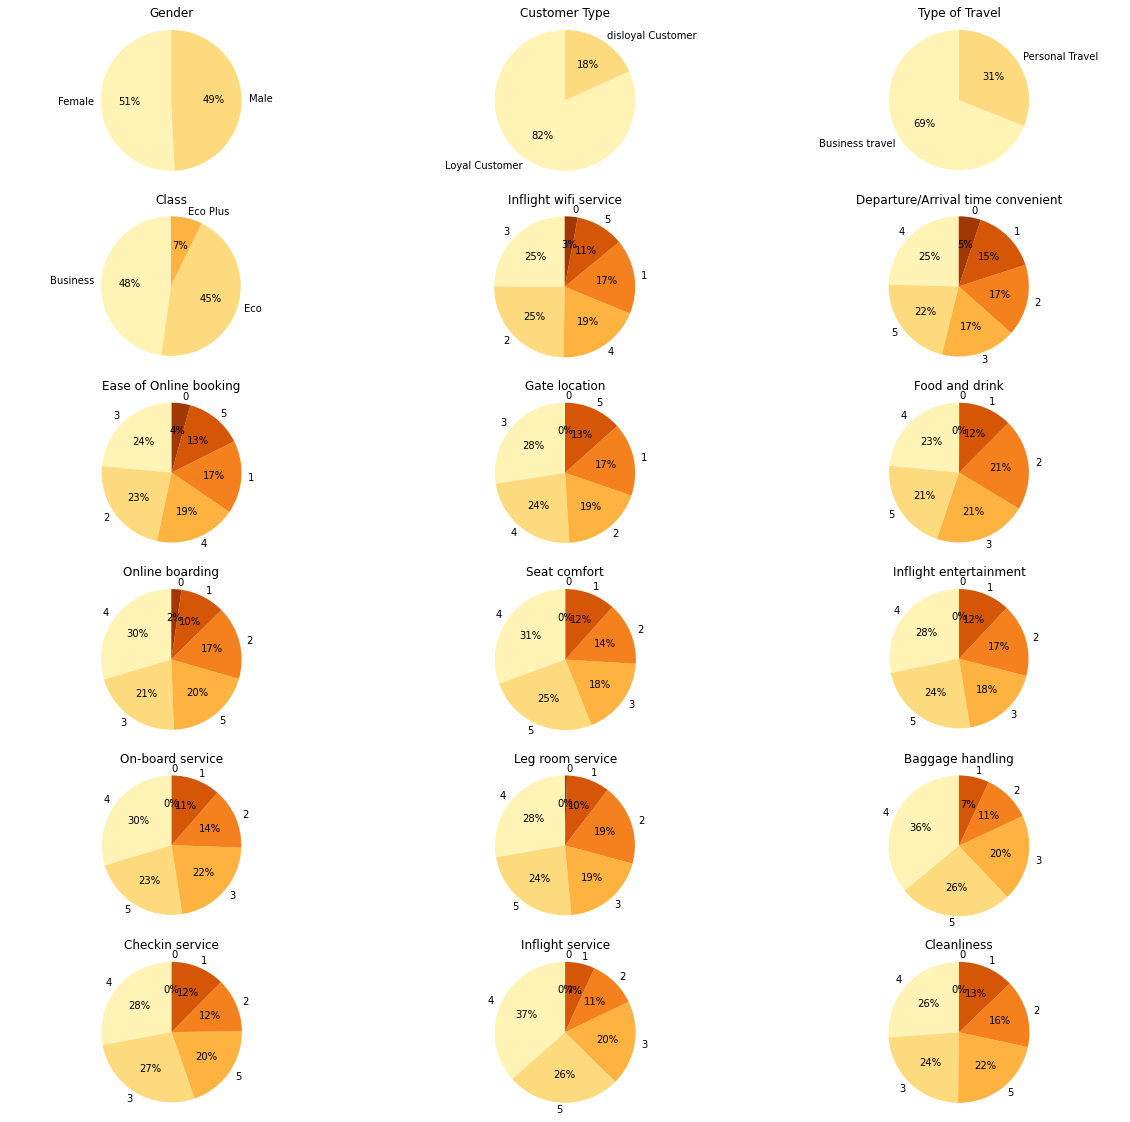

In [17]:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Некоторые выводы об рассматриваемой выборке:
<ul>
    <li>Количество мужчин и женщин в данной выборке примерно одинаковое</li>
    <li>Значительное большинство клиентов авиакомпании являются постоянными</li>
    <li>Большая часть клиентов совершили перелет ради деловой встречи, а не по личным делам</li>
    <li>Примерно половина пассажиров находилась в бизнес-классе</li>
    <li>Более 60% пассажиров остались довольны сервисом по транспортировке багажа (поставили оценки 4-5 из 5)</li>
    <li>Более 50% пассажирам было удобно сидеть на их креслах (поставили оценки 4-5 из 5)</li>
</ul>

Теперь рассмотрим несколько "ящиков с усами" (бокс-диаграмм).

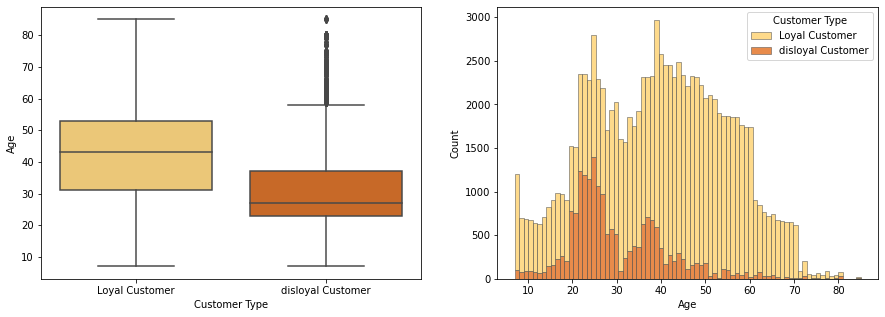

In [18]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

По данной бокс-диаграмме можно сделать вывод о том, что <b>большинство постоянных клиентов авиакомпании находятся в возрасте между 30 и 50 годами (в среднем их возраст немного больше 40 лет)</b>. Возрастной диапазон непостоянных клиентов немного меньше (от 25 до 40 лет, в среднем - немного меньше 30).

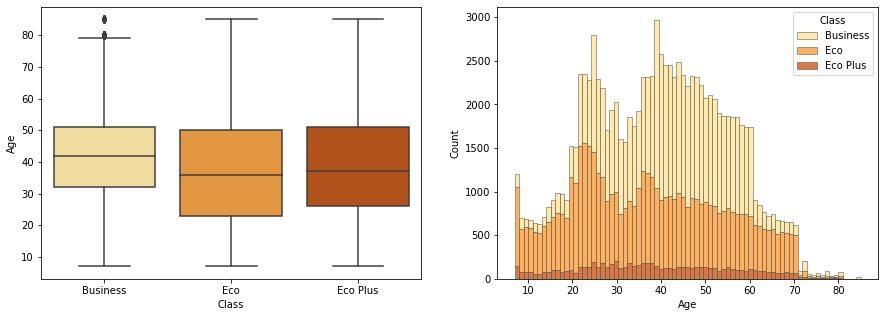

In [19]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Можно увидеть, что в среднем возрастной диапазон тех клиентов, которые путешествуют в бизнесс-классе, совпадает (в соответствии с предыдущей бокс-диаграммой) с возрастным диапазоном постоянных клиентов. На основании этого наблюдения можно предположить, что <b>постоянные клиенты в основном покупают себе бизнес-класс</b>.

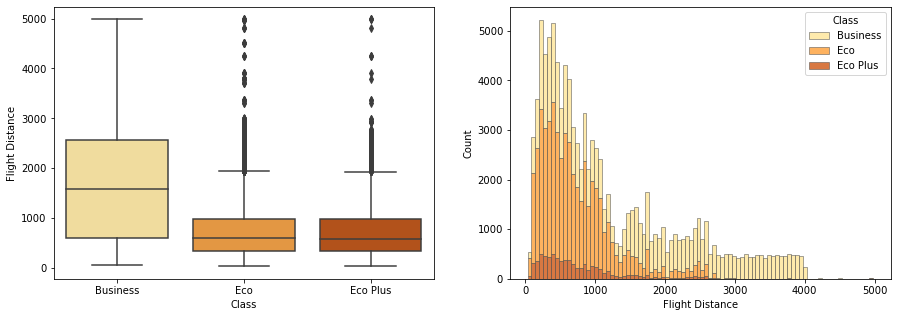

In [20]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

По данной бокс-диграмме можно сделать следующий вывод: <b>клиенты, расстояние полета которых является большим, в основном совершают перелет в бизнес-классе</b>.

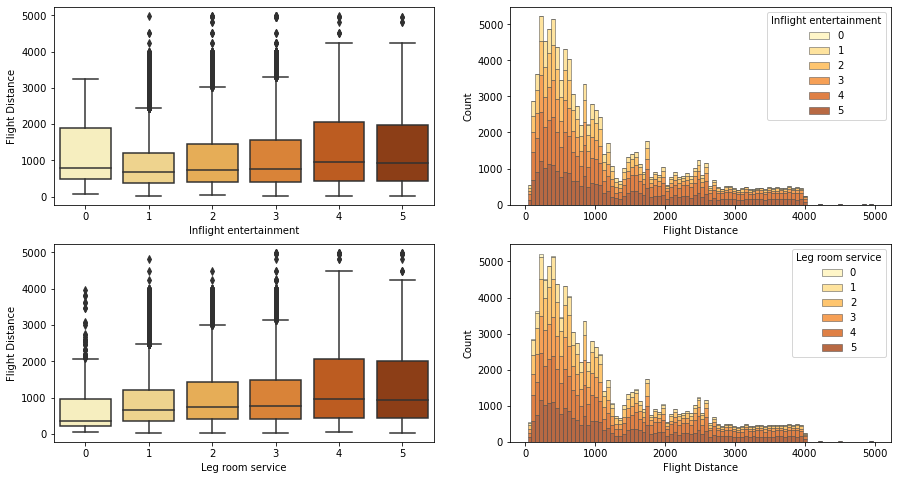

In [21]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

Можно заметить следующую закономерность: <b>чем большее расстояние пассажир самолета преодолевает (соответственно, дольше находится в полете), тем он больше доволен развлечениями в полете и дополнительным пространством для ног (в среднем)</b>.

Теперь рассмотрим графики зависимостей некоторых категориальных признаков от целевого - <em>удовлетворенности авиапассажиров</em>:

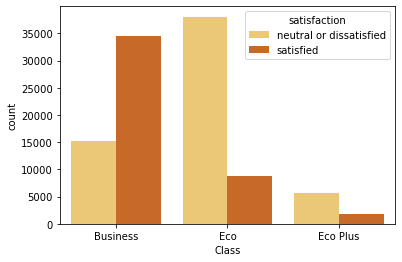

In [22]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

Данный график является очень показательным. Можно увидеть, что <b>большинство пассажиров, совершивших перелет в эконом плюс или эконом-классе, остались недовольны полетом, а те, кому посчастливилось совершить полет в бизнес-классе, довольны</b>.

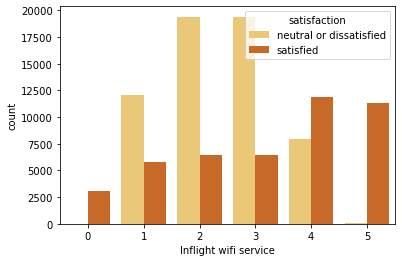

In [23]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

По данному графику можно заметить, что <b>практически все пассажиры, которые оценили wifi сервис на 5 из 5 баллов, остались довольны полетом</b>.

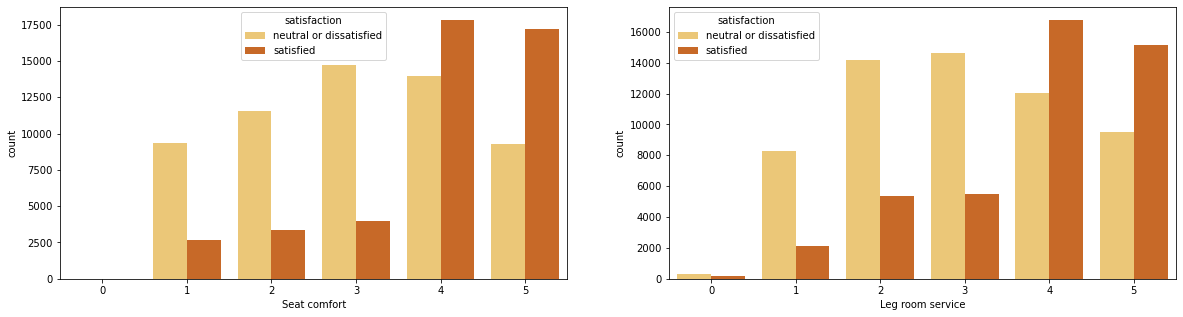

In [24]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = data, ax = ax[1])
plt.show()


По графикам выше можно сделать следующий вывод: <b>большинство пассажиров, которые оценили удобство кресел и дополнительное свободное место для ног на 4 и 5 баллов из 5, остались довольны полетом</b>.

## Заполнение пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце таблицы:

In [25]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заполним <b>медианами</b> пропущенные значения в столбцах, соответствующих количественным признакам:

In [26]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [27]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [28]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Из данной таблицы видно, что пропущенных значений больше нет.

## Обработка категориальных признаков

Разделим признаки на количественные и категориальные:

In [29]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

Разделим категориальные признаки на бинарные и небинарные:

In [30]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


Посмотрим на уникальные значения для каждого бинарного признака:

In [31]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


Выполним бинаризацию:

In [32]:
for col in binary_columns:
    data[col] = data[col].astype('object')
    k = 0
    for uniq in data[col].unique():
        data.at[data[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(data[col].describe(), end = '\n\n')

count     103904
unique         2
top            1
freq       52727
Name: Gender, dtype: int64

count     103904
unique         2
top            0
freq       84923
Name: Customer Type, dtype: int64

count     103904
unique         2
top            1
freq       71655
Name: Type of Travel, dtype: int64



Посмотрим теперь на небинарные категориальные признаки:

In [33]:
data[nonbinary_columns]

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


К небинарными признакам применим следующий метод векторизации:

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Такую векторизацию осуществляет метод get_dummies:

In [34]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [35]:
len(data_nonbinary.columns)

86

## Нормализация количественных признаков

Имеем следующие количественные признаки:

In [36]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Выполним <b>стандартизацию</b> (<em>линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению</em>) всех количественных признаков:

In [37]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [38]:
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.062606e-16,1.667322e-16,4.673560e-16,1.740579e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


## Формирование таблицы

Соединяем все преобразованные столбцы в одну таблицу:

In [39]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(103904, 93)


Теперь она имеет следующий вид:

In [40]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.062606e-16,1.667322e-16,4.673560e-16,1.740579e-16,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разделение данных на обучающую и тестовую выборки

Получим <b>X</b> и <b>y</b>:

In [41]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

In [42]:
X.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and 

In [43]:
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

Разобьем данные на обучающую и тестовую выборки в пропорции 9:1 <b>(90% – обучающая выборка, 10% – тестовая)</b>:

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(93513, 10391)

## Метод k-ближайших соседей (kNN)

Переберем количество соседей от 1 до 20 и определим оптимальное (с наименьшей ошибкой кросс-валидации) количество:

In [45]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.06368096327560957
Оптимальное количество соседей:  12


Обучим и запустим kNN для оптимального среди рассмотренных количества соседей:

In [46]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.054334691433276655
Ошибка на тестовой выборке:  0.06592243287460302


## SVC

Обучим и запустим метод опорных векторов:

In [47]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.04966154438420327
Ошибка на тестовой выборке:  0.050235780964296026


## Random Forest

Обучим и запустим случайный лес:

In [48]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.04003464536618227


## Extremely Randomized Trees

Обучим и запустим экстремально случайный лес:

In [49]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.03878356269848908


## AdaBoost

Обучим и запустим алгоритм AdaBoost:

In [50]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0702576112412178
Ошибка на тестовой выборке:  0.07160042344336445


## GBT

Обучим и запустим градиентный бустинг деревьев решений:

In [51]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.055286430763637144
Ошибка на тестовой выборке:  0.056394957174477914


## Общие выводы

***
<b>Выводы о рассматриваемой выборке</b>:

> <ul>
>     <li>Выборка является более менее сбалансированной <em>(56.7% на 43.3%)</em>.</li>
>     <li>Количество мужчин и женщин в данной выборке примерно одинаковое.</li>
>     <li>Значительное большинство клиентов авиакомпании являются постоянными.</li>
>     <li>Большая часть клиентов совершили перелет ради деловой встречи, а не по личным делам.</li>
>     <li>Примерно половина пассажиров находилась в бизнес-классе.</li>
>     <li>Более 60% пассажиров остались довольны сервисом по транспортировке багажа (поставили оценки 4-5 из 5).</li>
>     <li>Более 50% пассажирам было удобно сидеть на их креслах (поставили оценки 4-5 из 5).</li>
>     <li>Была замечена большая корреляция <em>(96%)</em> между признаками 'Задержка отправления в минутах' и 'Задержка прибытия в минутах' (что является вполне логичным и было подробно рассмотрено выше).</li>
>     <li>Большинство постоянных клиентов авиакомпании находятся в возрасте между 30 и 50 годами (в среднем их возраст немного больше 40 лет). Возрастной диапазон непостоянных клиентов немного меньше (от 25 до 40 лет, в среднем - немного меньше 30).</li>
>     <li>Клиенты, расстояние полета которых является большим, в основном совершают перелет в бизнес-классе.</li>
>     <li>Чем большее расстояние пассажир самолета преодолевает (соответственно, дольше находится в полете), тем он больше доволен развлечениями в полете и дополнительным пространством для ног (в среднем).</li>
>     <li>Большинство пассажиров, совершивших перелет в эконом плюс или эконом-классе, остались недовольны полетом, а те, кому посчастливилось совершить полет в бизнес-классе, довольны.</li>
>     <li>Практически все пассажиры, которые оценили wifi сервис на 5 из 5 баллов, остались довольны полетом.</li>
>     <li>Большинство пассажиров, которые оценили удобство кресел и дополнительное свободное место для ног на 4 и 5 баллов из 5, остались довольны полетом.
> </ul>

***
<b>Выводы о результатах классификации</b>:

> <ul>
>     <li>Для оптимального (с наименьшей ошибкой кросс-валидации) количества соседей было получено, что метод kNN ошибся на обучающей выборке в <em>5.4%</em> случаев, а на тестовой - в <em>6.6%</em> при обучении на 93.5 тыс. данных и тестировании на 10 тыс.</li>
>     <li>Для метода опорных векторов ошибка как на обучающей, так и на тестовой выборке составила <em>5%</em>.</li>
>     <li>Для классификаторов случайный лес и экстремально случайный лес ошибка на обучащей выборке не наблюдалась, а на тестовой составила <em>3.9%</em>.</li>
>     <li>Для алгоритма AdaBoost ошибка на обучающей выборке составила <em>7%</em>, а на тестовой – <em>7.2%</em>.</li>
>     <li>Для градиентного бустинга деревьев решений ошибка на обучающей и тестовой выборках составила <em>5.5% и 5.6%</em> соответственно.</li>
>     <li>Лучший результат показали классификаторы случайный и экстремально случайный лес (ошибка на тестовой выборке <em>3.9%).</em></li>
</ul>

***

## Нейронная сеть

### Разделение данных на обучающую и тестовую выборки

Общее количество данных:

In [52]:
N, d

(103904, 93)

Обучение нейронной сети требует много времени, поэтому возьмем не все данные, а только их часть:

In [53]:
N_train = 27000
N_test = 3000

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = y, random_state = 42)

In [55]:
X_train.shape, X_test.shape

((27000, 93), (3000, 93))

### Подбор гиперпараметров

Подбор гиперпараметров будет происходить двумя способами.

**Первый способ:**
<p align="center">
  <img src="https://raw.githubusercontent.com/Frixinglife/Homework_ML/d273a6627b6c9288fcadbb63b1ea009088821909/NeuroNet1.svg"/>
</p>

**Второй способ:**

Второй способ заключается в том, что одновременно будут перебираться следующие гиперпараметры (cначала первые два, а потом все три сразу):
<ul>
    <li>Параметр alpha</li>
    <li>Количество нейронов первого скрытого слоя</li>
    <li>Количество нейронов второго скрытого слоя</li>
</ul>
Но перебирать их будем в некоторой окрестности параметров, полученных ранее, иначе перебор будет очень долгим.

### Первый способ подбора гиперпараметров

#### Подбор оптимального параметра регуляризации alpha (для 1 скрытого слоя из 50 нейронов)

In [56]:
%%time
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = 50,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 4min 15s


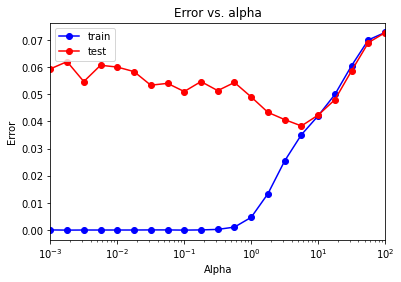

In [57]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

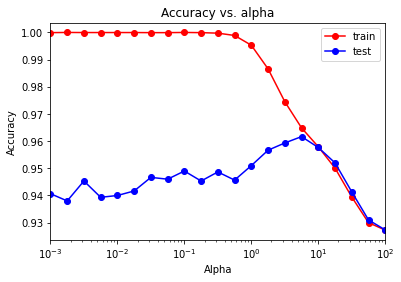

In [58]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

In [59]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.03833333333333333


In [60]:
alpha_local_opt = alpha_arr[test_err == min_test_err][0]
print('Оптимальное значение alpha: ', alpha_local_opt)

Оптимальное значение alpha:  5.623413251903491


#### Обучение классификатора при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов)

In [61]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = 50,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

Wall time: 13.4 s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=50, max_iter=1000, random_state=42,
              solver='lbfgs')

In [62]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.035111111111111114
Ошибка на тестовой выборке:  0.03833333333333333


#### Подбор количества нейронов одного скрытого слоя для оптимального (для 1 скрытого слоя из 50 нейронов) значения alpha

In [63]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = size,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 5min 46s


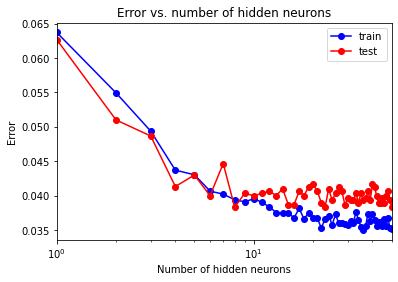

In [64]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Error')
plt.legend()
pass

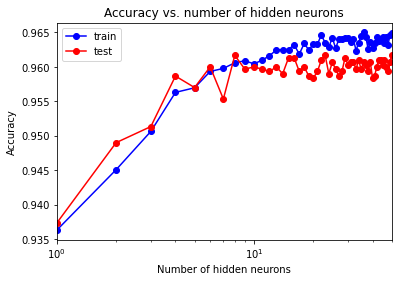

In [65]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Accuracy')
plt.legend()
pass

In [66]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.035
Минимальная ошибка на тестовой выборке:  0.03833333333333333


In [67]:
hidden_layer_local_opt_1 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов скрытого слоя: ', hidden_layer_local_opt_1)

Оптимальное значение количества нейронов скрытого слоя:  8


#### Обучение нейронной сети при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов) и оптимальном количестве нейронов первого скрытого слоя (для данного alpha)

In [68]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = hidden_layer_local_opt_1,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

Wall time: 2.37 s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=8, max_iter=1000, random_state=42,
              solver='lbfgs')

In [69]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.039407407407407405
Ошибка на тестовой выборке:  0.03833333333333333


#### Подбор количества нейронов второго скрытого слоя при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов) и оптимальном количестве нейронов первого скрытого слоя (для данного alpha)

In [70]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = (hidden_layer_local_opt_1, size),
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 10min 13s


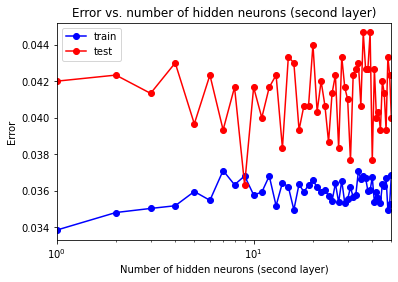

In [71]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Error')
plt.legend()
pass

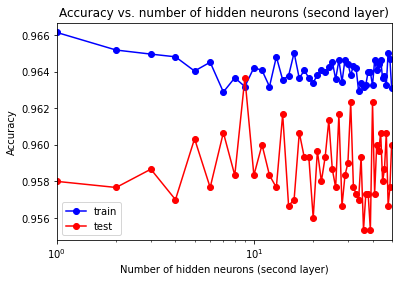

In [72]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Accuracy')
plt.legend()
pass

In [73]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.033851851851851855
Минимальная ошибка на тестовой выборке:  0.036333333333333336


In [74]:
hidden_layer_local_opt_2 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов второго скрытого слоя: ', hidden_layer_local_opt_2)

Оптимальное значение количества нейронов второго скрытого слоя:  9


#### Обучение нейронной сети при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов), оптимальных количествах нейронов первого и второго скрытых слоев

In [75]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = (hidden_layer_local_opt_1, hidden_layer_local_opt_2),
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

Wall time: 7.37 s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=(8, 9), max_iter=1000, random_state=42,
              solver='lbfgs')

In [76]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.036814814814814814
Ошибка на тестовой выборке:  0.036333333333333336


### Второй способ подбора гиперпараметров

####  Одновременный перебор alpha и количества нейронов скрытого слоя (для нейронной сети с одним скрытым слоем)

In [77]:
%%time
hidden_layer = np.arange(hidden_layer_local_opt_1 - 2, hidden_layer_local_opt_1 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size in hidden_layer:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, 
                                  hidden_layer_sizes = size,
                                  solver = 'lbfgs', 
                                  max_iter = 1000, 
                                  activation = 'logistic',
                                  random_state = 42)


        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        
        params = {'alpha': alpha, 'hidden_layer': size} 
        opt_params.append(params)

Wall time: 5min 40s


In [78]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.03162962962962963
Минимальная ошибка на тестовой выборке:  0.035666666666666666


In [79]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt = opt_params[index_opt]['hidden_layer']
print('Оптимальное значение количества нейронов скрытого слоя: ', hidden_layer_opt)

alpha_opt = opt_params[index_opt]['alpha']
print('Оптимальное значение alpha: ', alpha_opt)

Оптимальное значение количества нейронов скрытого слоя:  7
Оптимальное значение alpha:  0.01778279410038923


####  Одновременный перебор alpha, количества нейронов первого и второго скрытых слоев

In [80]:
%%time
hidden_layer_first = np.arange(hidden_layer_local_opt_1 - 2, hidden_layer_local_opt_1 + 2)
hidden_layer_second = np.arange(hidden_layer_local_opt_2 - 2, hidden_layer_local_opt_2 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size_first in hidden_layer_first:
    for size_second in hidden_layer_second:
        for alpha in alpha_arr:
            mlp_model = MLPClassifier(alpha = alpha, 
                                      hidden_layer_sizes = (size_first, size_second), 
                                      solver = 'lbfgs', 
                                      max_iter = 1000, 
                                      activation = 'logistic',
                                      random_state = 42)


            mlp_model.fit(X_train, y_train)

            y_train_pred = mlp_model.predict(X_train)
            y_test_pred = mlp_model.predict(X_test)

            train_err.append(np.mean(y_train != y_train_pred))
            test_err.append(np.mean(y_test != y_test_pred))
            train_acc.append(accuracy_score(y_train, y_train_pred))
            test_acc.append(accuracy_score(y_test, y_test_pred))
            
            params = {'alpha': alpha, 'hidden_layer_first': size_first, 'hidden_layer_second': size_second} 
            opt_params.append(params)

Wall time: 1h 12min 19s


In [81]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.021444444444444443
Минимальная ошибка на тестовой выборке:  0.034666666666666665


In [83]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt_1 = opt_params[index_opt]['hidden_layer_first']
print('Оптимальное значение количества нейронов первого скрытого слоя: ', hidden_layer_opt_1)

hidden_layer_opt_2 = opt_params[index_opt]['hidden_layer_second']
print('Оптимальное значение количества нейронов второго скрытого слоя: ', hidden_layer_opt_2)

alpha_opt = opt_params[index_opt]['alpha']
print('Оптимальное значение alpha: ', alpha_opt)

Оптимальное значение количества нейронов первого скрытого слоя:  6
Оптимальное значение количества нейронов второго скрытого слоя:  9
Оптимальное значение alpha:  0.1778279410038923


***

## Выводы

> <ul>
    >     <li>Наименьшая ошибка на тестовой выборке составила <em>3.46%</em> (результат лучше, чем для других классификаторов).</li>
>     <li>Данный результат был достигнут при параметре alpha ≈ 0.1778, количестве нейронов первого и второго скрытых слоев, равных 6 и 9 соответственно.</li>
>     <li>Обучение происходило не на всей выборке, а только на её части, но, несмотря на это, был достигнут очень хороший результат.</li>
>     <li>Поскольку качество обучения нейронных сетей зависит от количества входных данных, то при увеличении обучающей выборки может быть достигнут результат, лучший предыдущего.</li>
>     <li>Гиперпараметры перебирались в узких диапазонах. При увеличении диапазонов может быть достигнута меньшая ошибка.</li>
> </ul>

***

## Метод главных компонент (PCA)

Прежде чем переходить к запуску метода главных компонент, посмотрим на значения корреляций:

In [84]:
new_data = pd.DataFrame(data = X)
corr_mat = new_data.corr()
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

On-board service_0                   Inflight service_0          1.000000
Seat comfort_0                       Checkin service_0           1.000000
Departure Delay in Minutes           Arrival Delay in Minutes    0.960247
Inflight entertainment_0             Cleanliness_0               0.848650
Inflight wifi service_0              Ease of Online booking_0    0.767454
Ease of Online booking_0             Online boarding_0           0.715257
Food and drink_1                     Cleanliness_1               0.713990
                                     Inflight entertainment_1    0.696606
Inflight entertainment_1             Cleanliness_1               0.691414
Inflight entertainment_2             Cleanliness_2               0.686081
Inflight wifi service_1              Ease of Online booking_1    0.676906
Inflight wifi service_3              Ease of Online booking_3    0.672781
Inflight wifi service_2              Ease of Online booking_2    0.668880
Seat comfort_2                       C

Получаем, что большое количество признаков коррелируют друг с другом (новые признаки появились после обработки категориальных признаков).

Запустим метод главных компонент для уменьшения числа признаков. Будем выбирать количество главных компонент таким образом, чтобы объясненная дисперсия была не меньше некоторого заданного уровня – 0.85.

In [85]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 0.85) # сохраняем 85% дисперсии
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(103904, 93)
(103904, 33)


Заметим, что из 93 признаков осталось только 33.

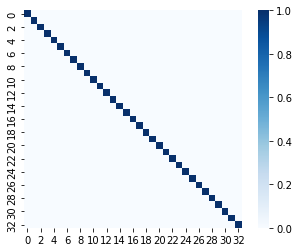

In [86]:
new_data = pd.DataFrame(data = X_proj)
corr_mat = new_data.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

Оставшиеся признаки не коррелируют друг с другом.

## Балансировка классов

Прежде чем переходить к балансировке классов, посмотрим, какое процентное соотношение имеется на данный момент:

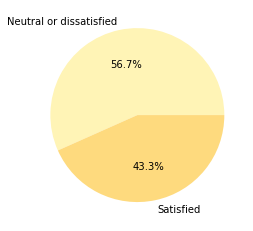

In [87]:
plt.pie(y.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Выборка является практически сбалансированной, наблюдается лишь небольшой перевес. Но попробуем сделать так, чтобы объектов каждого класса было равное количество.

In [88]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_miss, y_miss = nm.fit_resample(new_data, target.ravel())

In [89]:
print('После применения метода кол-во меток со значением "neutral or dissatisfied": {}'.format(sum(y_miss == "neutral or dissatisfied")))
print('После применения метода кол-во меток со значением "satisfied": {}'.format(sum(y_miss == "satisfied")))

После применения метода кол-во меток со значением "neutral or dissatisfied": 45025
После применения метода кол-во меток со значением "satisfied": 45025


Разобьем данные на обучающую и тестовую выборки в пропорции 9:1 (<b>90% – обучающая выборка, 10% – тестовая</b>):

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, test_size = 0.1, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(81045, 9005)

In [91]:
print('Кол-во меток в y_train со значением "neutral or dissatisfied": {}'.format(sum(y_train == "neutral or dissatisfied")))
print('Кол-во меток в y_train со значением "satisfied": {}'.format(sum(y_train == "satisfied")))

Кол-во меток в y_train со значением "neutral or dissatisfied": 40486
Кол-во меток в y_train со значением "satisfied": 40559


In [92]:
print('Кол-во меток в y_test со значением "neutral or dissatisfied": {}'.format(sum(y_test == "neutral or dissatisfied")))
print('Кол-во меток в y_test со значением "satisfied": {}'.format(sum(y_test == "satisfied")))

Кол-во меток в y_test со значением "neutral or dissatisfied": 4539
Кол-во меток в y_test со значением "satisfied": 4466


После разбиения на обучающую и тестовую выборку получили, что объектов разных классов примерно поровну.

## Метод k-ближайших соседей (kNN)

Переберем количество соседей от 1 до 20 и определим оптимальное (с наименьшей ошибкой кросс-валидации) количество:

In [93]:
%%time
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.09275094083533841
Оптимальное количество соседей:  11
Wall time: 24min 36s


Обучим и запустим kNN для оптимального среди рассмотренных количества соседей:

In [94]:
%%time
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.07822814485779506
Ошибка на тестовой выборке:  0.09561354802887286
Wall time: 1min 48s


## SVC

Обучим и запустим метод опорных векторов:

In [95]:
%%time
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.07235486458140539
Ошибка на тестовой выборке:  0.07862298722931704
Wall time: 16min 52s


## Random Forest

Обучим и запустим случайный лес:

In [96]:
%%time
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.09083842309827873
Wall time: 41.5 s


## Extremely Randomized Trees

Обучим и запустим экстремально случайный лес:

In [97]:
%%time
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.09017212659633538
Wall time: 10.6 s


## AdaBoost

Обучим и запустим алгоритм AdaBoost:

In [98]:
%%time
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.1247701894009501
Ошибка на тестовой выборке:  0.12815102720710717
Wall time: 38.6 s


## GBT

Обучим и запустим градиентный бустинг деревьев решений:

In [99]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.11276451354185946
Ошибка на тестовой выборке:  0.11815657967795669
Wall time: 1min 13s


## Общие результаты и выводы

Сравним ошибки работы классификторов до уменьшения количества признаков и балансировки классов и после:

<p align="center">
  <img src="https://raw.githubusercontent.com/Frixinglife/Homework_ML/d273a6627b6c9288fcadbb63b1ea009088821909/NeuroNet1.svg"/>
</p>

## Выводы

> <ul>
>     <li><b>Метод главных компонент и балансировка классов не помогли, ошибка на тестовой выборке стала хуже</b> (возрасла примерно в 2 раза для каждого из методов). Скорее всего это объясняется тем, что в результате работы PCA были выкинуты важные для классификации признаки (было 93 признака, о остались все 33, т.е. примерно треть от изначальных). Количество главных компонент выбиралось таким образом, чтобы объясненная дисперсия была не меньше 0.85.</li>
> </ul>

> <ul>
>     <li><b>Несмотря на то, что при применении PCA результаты ухудшились, из выборки были исключены коррелирующие признаки.</b> Вполне возможно, что при переборе гиперпараметров PCA можно добиться гораздо лучших результатов. </li>
> </ul>

> <ul>
>     <li><b>После применения PCA наименьшая ошибка на тестовой выборке была достигнула классификатором SVC (с ядром RBF) и составила 7.86%.</b></li>
> </ul>

> <ul> 
>      <li><b>Классификатор Extremely Randomized Trees (n_estimators = 100) оказался лучшим для начальной выборки</b> (рассматривается выборка до балансировки и применения PCA. <b>Ошибка на тестовой выборке составила 3.88%</b> . Кроме того данный метод как до применения PCA, так и после, работал быстрее всех (примерно 10 секунд). </li>
> </ul>
    
> <ul> 
>     <li><b>Классификатор AdaBoost оказался худшим для начальной выборки</b> (рассматривается выборка до балансировки и применения PCA). <b>Ошибка на тестовой выборке составила 7.16%</b> . Но данный метод запускался только один раз и с параметром n_estimators = 100. Предположительно ошибку можно значительно уменьшить, осуществив подбор гиперпараметров. </li>
> </ul>

> <ul>
>     <li><b>Лучшие результаты показала нейронная сеть,</b> представленная в прошлой главе, <b>но она запускалась (и обучалась) на меньшей выборке</b>, поскольку долго обучается (одновременно перебирались количество нейронов на первом и втором слоях и параметр alpha). <b>Ошибка на тестовой выборке составила 3.46% </b>(alpha ≈ 0.1778, количестве нейронов первого и второго скрытых слоев, равных 6 и 9 соответственно). </li>
> </ul>